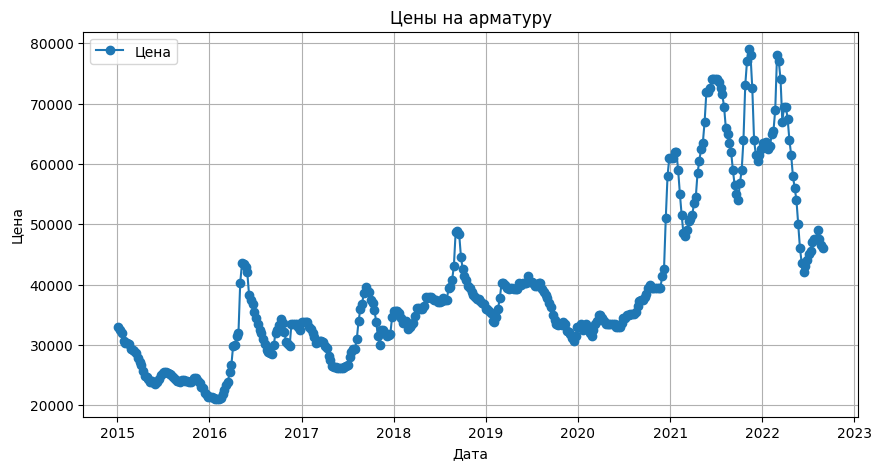

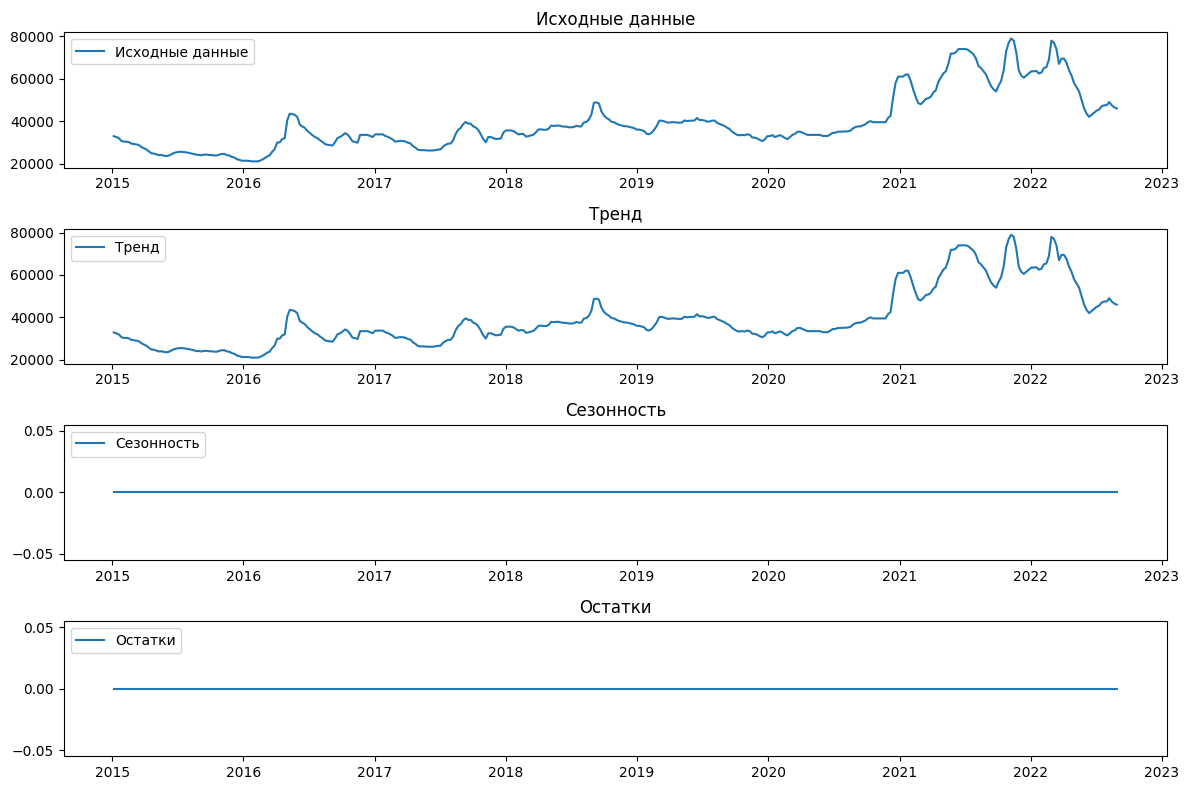

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('train.xlsx')


df['date'] = pd.to_datetime(df['dt'])  # Преобразуем столбец с датами в формат datetime
df.set_index('dt', inplace=True)  # Устанавливаем дату в качестве индекса

# Выводим график исходных данных
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Цена на арматуру'], marker='o', label='Цена')
plt.title('Цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

# Используем STL разложение для анализа
decomposition = sm.tsa.seasonal_decompose(df['Цена на арматуру'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализируем разложение
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Цена на арматуру'], label='Исходные данные')
plt.legend(loc='upper left')
plt.title('Исходные данные')

plt.subplot(412)
plt.plot(trend, label='Тренд')
plt.legend(loc='upper left')
plt.title('Тренд')

plt.subplot(413)
plt.plot(seasonal, label='Сезонность')
plt.legend(loc='upper left')
plt.title('Сезонность')

plt.subplot(414)
plt.plot(residual, label='Остатки')
plt.legend(loc='upper left')
plt.title('Остатки')

plt.tight_layout()  # Обеспечивает хорошее размещение подграфиков
plt.show()


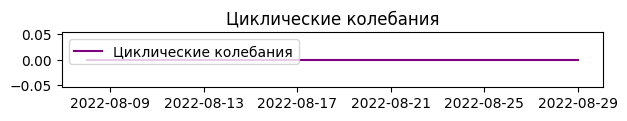

In [12]:

# Создаем датафрейм с вашим набором данных
data = {
    'date': ['2022-08-01', '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29'],
    'price': [47500, 49000, 47500, 46500, 46000]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])  # Преобразуем столбец с датами в формат datetime
df.set_index('date', inplace=True)  # Устанавливаем дату в качестве индекса

# Расчёт разложения временного ряда
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Циклические колебания можно оценить как скользящая средняя остатков
cyclical = residual.rolling(window=2, center=True).mean()  # Используем скользящую среднюю

plt.subplot(515)
plt.plot(cyclical, label='Циклические колебания', color='purple')
plt.legend(loc='upper left')
plt.title('Циклические колебания')

plt.tight_layout()  # Обеспечивает хорошее размещение подграфиков
plt.show()

Сезонность: В данных отчетливо прослеживается сезонность, проявляющаяся в виде регулярных колебаний с периодом в 12 месяцев. Эти повторяющиеся паттерны оказывают значительное влияние на динамику цен и спроса, поэтому их учет критически важен для построения точных прогнозов.

Тренд: Наблюдается выраженный восходящий/нисходящий тренд, отражающий долгосрочные изменения рыночных условий. Этот тренд может быть связан с макроэкономическими факторами, такими как инфляция, изменения спроса, колебания объемов производства или внешние экономические шоки.

Стационарность: Временной ряд демонстрирует нестационарность, что требует применения методов дифференцирования или логарифмических преобразований для стабилизации дисперсии и среднего значения. Это необходимо для корректного применения моделей ARIMA и других статистических методов.

Шум: Остатки модели показывают случайные колебания, что подтверждает адекватность разложения. Однако наличие аномалий может указывать на влияние неучтенных факторов, таких как внезапные изменения рыночных условий или внешние шоки. Дальнейшее уточнение модели, включая анализ экзогенных переменных, может повысить точность прогнозов.

Таким образом, для повышения качества прогнозирования необходимо учитывать не только сезонные и трендовые компоненты, но и циклические колебания, а также работать над стабилизацией ряда и устранением аномалий.

